# Predict MLB

**Predict playoff odds for MLB teams**

## Let's predict odds for playoff

*data source : http://m.mlb.com/stats/  
*For using MLB API, you need to do pip install MLB-StatsAPI

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

# import MLB-StatsAPI
import statsapi as mlb

In [2]:
# Load data from CSV
hitting_df = pd.read_csv('mlb_stats/Hitting.csv')
hitting_df.head(3)

,Year,RK,Team,League,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG▼,OBP,SLG,OPS
0,2018.0,1,Boston Red Sox,AL,162,5623,876,1509,355,31,208,829,569,1253,125,31,0.268,0.339,0.453,0.792
1,NaN,2,Cleveland Indians,AL,162,5595,818,1447,297,19,216,786,554,1189,135,36,0.259,0.332,0.434,0.766
2,NaN,3,Tampa Bay Rays,AL,162,5475,716,1415,274,43,150,664,540,1388,128,51,0.258,0.333,0.406,0.740


In [3]:
# Set Year Value for NaN
def set_year(df):
    """Set year value with previous year value for NaN"""
    for i, row in df.iterrows():
        if np.isnan(row['Year']):
            df.loc[i, 'Year'] = year
        else:
            year = row['Year']

In [4]:
# Cleaning for Hitting
set_year(hitting_df)
hitting_df.head(3)

,Year,RK,Team,League,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG▼,OBP,SLG,OPS
0,2018.0,1,Boston Red Sox,AL,162,5623,876,1509,355,31,208,829,569,1253,125,31,0.268,0.339,0.453,0.792
1,2018.0,2,Cleveland Indians,AL,162,5595,818,1447,297,19,216,786,554,1189,135,36,0.259,0.332,0.434,0.766
2,2018.0,3,Tampa Bay Rays,AL,162,5475,716,1415,274,43,150,664,540,1388,128,51,0.258,0.333,0.406,0.740


In [5]:
# Loading Pitching
pitching_df = pd.read_csv('mlb_stats/Pictching.csv')
pitching_df.head(3)

,Year,RK,Team,League,W,L,ERA,G,GS,SV,SVO,IP,H,R,ER,HR,BB,SO,AVG▼,WHIP
0,2018.0,1,Baltimore Orioles,AL,47,115,5.18,162,162,28,46,1431.0,1552,892,824,234,589,1203,0.276,1.50
1,NaN,2,Kansas City Royals,AL,58,104,4.94,162,162,33,57,1432.0,1542,833,786,205,549,1157,0.275,1.46
2,NaN,3,Texas Rangers,AL,67,95,4.92,162,162,42,56,1431.0,1516,848,783,222,491,1121,0.271,1.40


In [6]:
# Cleaning Pitching
set_year(pitching_df)
pitching_df.head(3)

,Year,RK,Team,League,W,L,ERA,G,GS,SV,SVO,IP,H,R,ER,HR,BB,SO,AVG▼,WHIP
0,2018.0,1,Baltimore Orioles,AL,47,115,5.18,162,162,28,46,1431.0,1552,892,824,234,589,1203,0.276,1.50
1,2018.0,2,Kansas City Royals,AL,58,104,4.94,162,162,33,57,1432.0,1542,833,786,205,549,1157,0.275,1.46
2,2018.0,3,Texas Rangers,AL,67,95,4.92,162,162,42,56,1431.0,1516,848,783,222,491,1121,0.271,1.40


In [7]:
# Loading Fielding
fielding_df = pd.read_csv('mlb_stats/Fielding.csv')
fielding_df.head(3)

,Year,RK,Team,League,G,GS,INN,TC,PO,A,E,DP,SB,CS,SBPCT,PB,C_WP,FPCT▼,DER
0,2018.0,1,Houston Astros,AL,162,1458,13095.0,5797,4365,1369,63,116,60,25,0.706,15,67,0.989,0.707
1,NaN,2,Washington Nationals,NL,162,1458,13014.0,5765,4338,1363,64,115,75,43,0.636,10,42,0.989,0.703
2,NaN,3,Arizona Diamondbacks,NL,162,1458,13167.0,6150,4389,1686,75,152,66,27,0.710,6,69,0.988,0.699


In [8]:
# Cleaning Fielding
set_year(fielding_df)
fielding_df.head(3)

,Year,RK,Team,League,G,GS,INN,TC,PO,A,E,DP,SB,CS,SBPCT,PB,C_WP,FPCT▼,DER
0,2018.0,1,Houston Astros,AL,162,1458,13095.0,5797,4365,1369,63,116,60,25,0.706,15,67,0.989,0.707
1,2018.0,2,Washington Nationals,NL,162,1458,13014.0,5765,4338,1363,64,115,75,43,0.636,10,42,0.989,0.703
2,2018.0,3,Arizona Diamondbacks,NL,162,1458,13167.0,6150,4389,1686,75,152,66,27,0.710,6,69,0.988,0.699


In [9]:
# Make a single data frame with join method
# temp_df = hitting_df.join(pitching_df, on=['Year', 'Team'], how="left")
temp_df = pd.merge(hitting_df, pitching_df, how='left', on=['Year', 'Team'])

In [10]:
temp_df.head()

,Year,RK_x,Team,League_x,G_x,AB,R_x,H_x,2B,3B,...,SVO,IP,H_y,R_y,ER,HR_y,BB_y,SO_y,AVG▼_y,WHIP
0,2018.0,1,Boston Red Sox,AL,162,5623,876,1509,355,31,...,66,1458.2,1305,647,608,176,512,1558,0.237,1.25
1,2018.0,2,Cleveland Indians,AL,162,5595,818,1447,297,19,...,58,1457.1,1349,648,611,200,407,1544,0.242,1.20
2,2018.0,3,Tampa Bay Rays,AL,162,5475,716,1415,274,43,...,74,1448.1,1236,646,602,164,501,1421,0.230,1.20
3,2018.0,4,Chicago Cubs,NL,163,5624,761,1453,286,34,...,65,1476.1,1319,645,598,157,622,1333,0.240,1.31
4,2018.0,5,Atlanta Braves,NL,162,5582,759,1433,314,29,...,60,1456.2,1236,657,607,153,635,1423,0.229,1.28


In [11]:
df = pd.merge(temp_df, fielding_df, how='left', on=['Year', 'Team'])

In [12]:
df.head()

,Year,RK_x,Team,League_x,G_x,AB,R_x,H_x,2B,3B,...,A,E,DP,SB_y,CS_y,SBPCT,PB,C_WP,FPCT▼,DER
0,2018.0,1,Boston Red Sox,AL,162,5623,876,1509,355,31,...,1366,77,106,64,30,0.681,25,51,0.987,0.694
1,2018.0,2,Cleveland Indians,AL,162,5595,818,1447,297,19,...,1353,83,123,81,29,0.736,9,54,0.986,0.689
2,2018.0,3,Tampa Bay Rays,AL,162,5475,716,1415,274,43,...,1483,85,136,78,27,0.743,17,55,0.986,0.709
3,2018.0,4,Chicago Cubs,NL,163,5624,761,1453,286,34,...,1675,104,155,84,40,0.677,12,46,0.983,0.702
4,2018.0,5,Atlanta Braves,NL,162,5582,759,1433,314,29,...,1439,80,134,102,28,0.785,13,61,0.986,0.710


In [13]:
standing_2018 = mlb.standings(season=2018, standingsTypes='byLeague')
print(standing_2018)

American League East
Rank Team                   W   L   GB  (E#) WC Rank WC GB (E#)
 1   Boston Red Sox        108 54   -    -      -      -    E  
 2   New York Yankees      100 62  8.0   E      1    +3.0   -  
 3   Tampa Bay Rays        90  72  18.0  E      3     7.0   E  
 4   Toronto Blue Jays     73  89  35.0  E      7    24.0   E  
 5   Baltimore Orioles     47  115 61.0  E     12    50.0   E  

American League West
Rank Team                   W   L   GB  (E#) WC Rank WC GB (E#)
 1   Houston Astros        103 59   -    -      -      -    E  
 2   Oakland Athletics     97  65  6.0   E      2      -    -  
 3   Seattle Mariners      89  73  14.0  E      4     8.0   E  
 4   Los Angeles Angels    80  82  23.0  E      5    17.0   E  
 5   Texas Rangers         67  95  36.0  E      8    30.0   E  

American League Central
Rank Team                   W   L   GB  (E#) WC Rank WC GB (E#)
 1   Cleveland Indians     91  71   -    -      -      -    E  
 2   Minnesota Twins       78  84  1

In [14]:
# Check the standing of team by year
prev_year = ''
for i, row in df.iterrows():
    year = row['Year']
    team = row['Team']
    
    # get standings by calling the mlb API
    if prev_year != year:
        standings = mlb.standings(season=year).split('\n')
    prev_year = year

    for standing in standings:
        if standing.find(team) != -1:
            # Found the team and
            if '1' in standing.split(' '):
                # if contains '1' means division winner or WC winner
                df.loc[i, 'Playoff'] = 1
#                 print(f'{team} {year} advanced to playoff')
            else:
                df.loc[i, 'Playoff'] = 0                
#                 print(f'{team} {year} failed to advance playoff')
            continue
#     else:
#         # If team does not found on the standings from MLB API
#         # Assume it, failed to playoff
#         print(f'{team} {year} is not on the list !!!')
#         df.loc[i, 'Playoff'] = 0

In [15]:
# Check new values
df['Playoff'].unique()

array([1., 0.])

## Data Understanding

In [16]:
# Set seaborn style
sns.set_style('whitegrid')

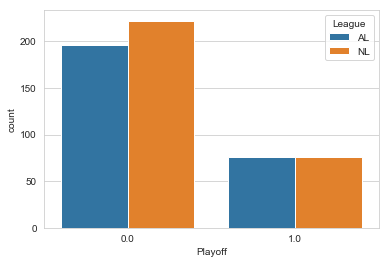

In [17]:
# Check target variable by League
sns.countplot(x='Playoff', hue='League', data=df)

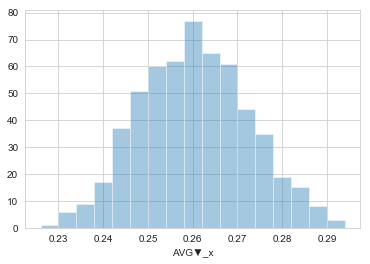

In [18]:
# Histogram for Batting Average
sns.distplot(df['AVG▼_x'], kde=False)

### Constrain about data

Most variable in data set is a result value from whole season(162 games), but in terms of predict the odds of playoff, it means the season is not over yet. The number of hits, runs, homeruns could be smaller than at the end of season.   
First of all, let's start with variables from **ratio**.  

We could use.  
- AVG▼_x : Batting Average
- OPS : On base Plus Slugging
- ERA : Earned Run Average
- WHIP : Walks plus Hits divided by Innings Pitched
- FPCT▼ : Fielding PerCenTage
- DEF : Defense Efficiency Ratio (1 - ((H + ROE - HR) / (PA - BB - SO - HBP - HR)))

In [19]:
# Set features with Batting AVG, OPS, ERA, Pitching AVG, WHIP, FPCT, DER
features = ['AVG▼_x', 'OPS' , 'ERA', 'WHIP', 'FPCT▼', 'DER']

In [20]:
# Let's check the features for advanced team
df.loc[df['Playoff'] == 1, features].describe()

,AVG▼_x,OPS,ERA,WHIP,FPCT▼,DER
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,0.265368,0.765901,3.857829,1.293684,0.984237,0.696421
std,0.011196,0.032390,0.389936,0.071675,0.002272,0.010318
min,0.238000,0.689000,2.940000,1.100000,0.978000,0.672000
25%,0.257000,0.739750,3.590000,1.240000,0.983000,0.689000
50%,0.265000,0.767000,3.835000,1.290000,0.984000,0.695500
75%,0.273000,0.786000,4.105000,1.332500,0.986000,0.703250
max,0.290000,0.851000,4.760000,1.500000,0.989000,0.731000


In [21]:
# Compare with all teams
df[features].describe()

,AVG▼_x,OPS,ERA,WHIP,FPCT▼,DER
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,0.259825,0.742154,4.235070,1.357193,0.983405,0.691512
std,0.012099,0.038300,0.529807,0.094699,0.002638,0.010800
min,0.226000,0.627000,2.940000,1.100000,0.976000,0.655000
25%,0.251000,0.716000,3.850000,1.290000,0.982000,0.684000
50%,0.260000,0.741500,4.200000,1.360000,0.983000,0.692000
75%,0.268000,0.768750,4.597500,1.420000,0.985000,0.699000
max,0.294000,0.851000,5.710000,1.640000,0.991000,0.731000


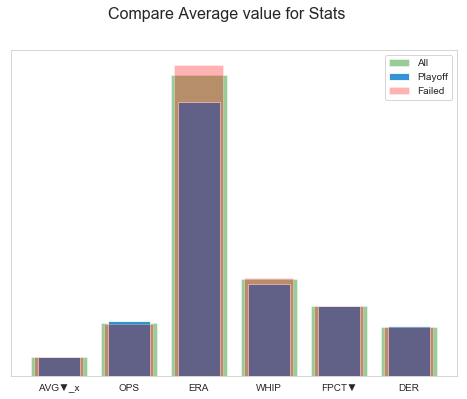

In [22]:
# Draw a chart with matplotlib
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(features, 
       df[features].mean(), 
       color='green', 
       alpha=.4,
       width=.8,
       label='All')

ax.bar(features, 
       df.loc[df['Playoff'] == 1, features].mean(), 
       color='#007acc', 
       alpha=.8, 
       width=.6, 
       label='Playoff')

ax.bar(features, 
       df.loc[df['Playoff'] == 0, features].mean(), 
       color='red', 
       alpha=.3, 
       width=.7, 
       label='Failed')

ax.grid(False)
ax.set_yticks([])

fig.suptitle("Compare Average value for Stats", fontsize=16)

# for rect in ax.patches:
#     y_value = rect.get_height()
#     x_value = rect.get_x() + rect.get_width() / 2

#     label = '{:.3f}'.format(y_value)
#     plt.annotate(label, (x_value, y_value), ha='center' )
plt.legend()
plt.show()

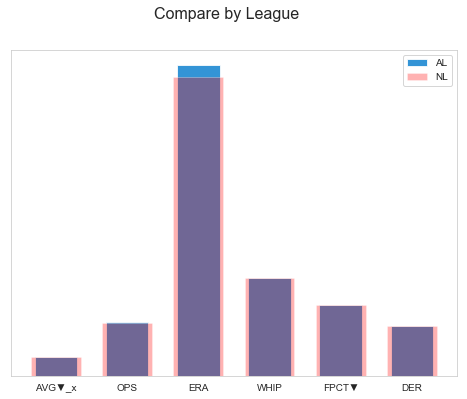

In [23]:
# Draw a chart with matplotlib
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(features, 
       df.loc[df['League'] == 'AL', features].mean(), 
       color='#007acc', 
       alpha=.8, 
       width=.6, 
       label='AL')

ax.bar(features, 
       df.loc[df['League'] == 'NL', features].mean(), 
       color='red', 
       alpha=.3, 
       width=.7, 
       label='NL')

ax.grid(False)
ax.set_yticks([])

fig.suptitle("Compare by League", fontsize=16)

# for rect in ax.patches:
#     y_value = rect.get_height()
#     x_value = rect.get_x() + rect.get_width() / 2

#     label = '{:.3f}'.format(y_value)
#     plt.annotate(label, (x_value, y_value), ha='center' )
plt.legend()
plt.show()

## Modeling

### First model - Logistic Regression

In [24]:
# import functions from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

import itertools


In [25]:
X = df[features]

In [26]:
X.head()

,AVG▼_x,OPS,ERA,WHIP,FPCT▼,DER
0,0.268,0.792,3.75,1.25,0.987,0.694
1,0.259,0.766,3.77,1.20,0.986,0.689
2,0.258,0.740,3.74,1.20,0.986,0.709
3,0.258,0.744,3.65,1.31,0.983,0.702
4,0.257,0.742,3.75,1.28,0.986,0.710


In [27]:
# Set target variable
y = df['Playoff']

In [28]:
y.head()

0    1.0
1    1.0
2    0.0
3    1.0
4    1.0
Name: Playoff, dtype: float64

In [29]:
# Scale with Standard Scaler
ss = StandardScaler()

In [30]:
scaled_X = ss.fit_transform(X)

In [31]:
# Split dataset for train & test
X_train, X_test, y_train, y_test = train_test_split(scaled_X, 
                                                    y, 
                                                    test_size=.25, 
                                                    random_state=27)

In [32]:
# Set a L.R model with lbfgs
model = LogisticRegression(solver='lbfgs', random_state=27)

In [33]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=27, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
# Get score for evaluation
model.score(X_test, y_test)

0.8461538461538461

In [35]:
model.score(X_train, y_train)

0.8875878220140515

In [36]:
# get prediction values
train_predicts = model.predict(X_train)
test_predicts = model.predict(X_test)

In [37]:
# get f1 score
f1_score(y_test, test_predicts)

0.6666666666666667

In [38]:
# get roc_auc score
roc_auc_score(y_test, test_predicts)

0.7776578521316784

In [39]:
# Check the coef value
model.coef_

array([[ 0.22713995,  2.05501942, -2.46193326, -0.16758336,  0.07098002,
        -0.15955148]])

In [40]:
# Check classification report
print(classification_report(y_test, test_predicts))

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90       109
         1.0       0.69      0.65      0.67        34

   micro avg       0.85      0.85      0.85       143
   macro avg       0.79      0.78      0.78       143
weighted avg       0.84      0.85      0.84       143



In [41]:
print(classification_report(y_train, train_predicts))

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92       309
         1.0       0.83      0.75      0.79       118

   micro avg       0.89      0.89      0.89       427
   macro avg       0.87      0.84      0.85       427
weighted avg       0.89      0.89      0.89       427



### Draw Confusion Matrix with matplotlib

In [42]:
def show_cf(y_true, y_pred, class_names=None, model_name=None):
    """Draw a confusion matrix with matplotlib"""
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
        
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], 
                 horizontalalignment='center',
                 verticalalignment='top' if i == 0 else 'bottom',
                 color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

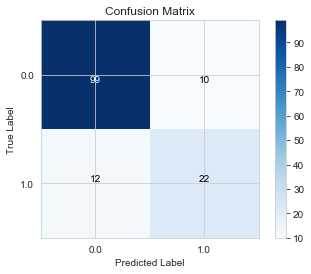

In [43]:
show_cf(y_test, test_predicts)

### Playoff odds on 7/19/19    

Seattle Mariners  
- Batting AVG : .242
- OPS : .763
- ERA : 5.30
- WHIP : 1.44
- FPCT : .974
- DER : .685


In [44]:
mariners_0719 = [[.242, .763, 5.30, 1.44, .974, .685]]

In [45]:
scaled_mariners = ss.transform(mariners_0719)

In [46]:
proba = model.predict_proba(scaled_mariners)

In [47]:
print(f'Playoff odds for Seattle Mariners is {proba[0][1] * 100:0.2f}%.')

Playoff odds for Seattle Mariners is 0.11%.


LA Dodgers    
- Batting AVG : .263
- OPS : .814
- ERA : 3.38
- WHIP : 1.09
- FPCT : .981
- DER : .718

In [48]:
dodgers_0719 = [[.263, .814, 3.38, 1.09, .981, .718]]

In [49]:
scaled_dodgers = ss.transform(dodgers_0719)

In [50]:
proba = model.predict_proba(scaled_dodgers)

In [51]:
print(f'Playoff odds for LA Dodgers is {proba[0][1] * 100:0.2f}%.')

Playoff odds for LA Dodgers is 99.63%.
